In [78]:
import os
import PIL
from PIL import Image
import numpy as np
from segment_anything import SamAutomaticMaskGenerator
import matplotlib.pyplot as plt 

In [1]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/data/SAM_pretrained_weights/sam_vit_h_4b8939.pth")

In [2]:
predictor = SamPredictor(sam)

In [4]:
img_path = '/data/DOTA_split/val/images/P0168__512__1560___936.jpg'

In [47]:
img_prefix = '/data/DOTA_split/val/images/'

In [7]:
import json

anno = ''
with open('/data/DOTA_split/annotations/annotations_val.json') as fp:
    anno = json.loads(fp.read())


In [18]:
print (anno['categories'])
cat2id = {i['name']:i['id'] for i in anno['categories']}

[{'id': 0, 'name': 'plane', 'supercategory': 'plane'}, {'id': 1, 'name': 'ship', 'supercategory': 'ship'}, {'id': 2, 'name': 'storage-tank', 'supercategory': 'storage-tank'}, {'id': 3, 'name': 'baseball-diamond', 'supercategory': 'baseball-diamond'}, {'id': 4, 'name': 'tennis-court', 'supercategory': 'tennis-court'}, {'id': 5, 'name': 'basketball-court', 'supercategory': 'basketball-court'}, {'id': 6, 'name': 'ground-track-field', 'supercategory': 'ground-track-field'}, {'id': 7, 'name': 'harbor', 'supercategory': 'harbor'}, {'id': 8, 'name': 'bridge', 'supercategory': 'bridge'}, {'id': 9, 'name': 'large-vehicle', 'supercategory': 'large-vehicle'}, {'id': 10, 'name': 'small-vehicle', 'supercategory': 'small-vehicle'}, {'id': 11, 'name': 'helicopter', 'supercategory': 'helicopter'}, {'id': 12, 'name': 'roundabout', 'supercategory': 'roundabout'}, {'id': 13, 'name': 'soccer-ball-field', 'supercategory': 'soccer-ball-field'}, {'id': 14, 'name': 'swimming-pool', 'supercategory': 'swimming-

In [37]:
target_cat = 'helicopter'
target_catid = cat2id[target_cat]+1

In [22]:
imgid2fname = {i['id']:i['file_name'] for i in anno['images']}

In [43]:
target_imgids = list(set([i['image_id'] for i in anno['annotations'] if i['category_id'] == target_catid]))

In [44]:
target_imgid = target_imgids[0]
target_fname = imgid2fname[target_imgid]
target_annos = [i for i in anno['annotations'] if i['image_id'] == target_imgid]

In [57]:
img_fullpath = os.path.join(img_prefix,target_fname)
img = Image.open(img_fullpath)

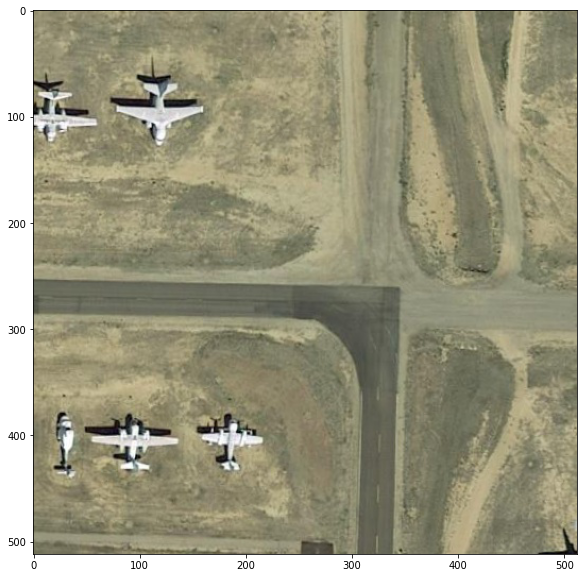

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [59]:
for _anno in target_annos:
    print (_anno)

{'area': 2001.0, 'category_id': 12, 'iscrowd': 0, 'bbox': [16, 374, 29, 69], 'image_id': 31746, 'id': 142108}
{'area': 4784.0, 'category_id': 1, 'iscrowd': 0, 'bbox': [50, 386, 92, 52], 'image_id': 31746, 'id': 142109}
{'area': 3905.0, 'category_id': 1, 'iscrowd': 0, 'bbox': [152, 384, 71, 55], 'image_id': 31746, 'id': 142110}
{'area': 6003.0, 'category_id': 1, 'iscrowd': 0, 'bbox': [76, 63, 87, 69], 'image_id': 31746, 'id': 142111}
{'area': 5115.0, 'category_id': 1, 'iscrowd': 0, 'bbox': [-26, 74, 93, 55], 'image_id': 31746, 'id': 142112}


In [89]:
target_sampled_anno = np.asarray([152, 384, 152+71, 384+55])

In [90]:
predictor.set_image(np.asarray(img))

masks, _, _ = predictor.predict(box=target_sampled_anno, multimask_output=True)

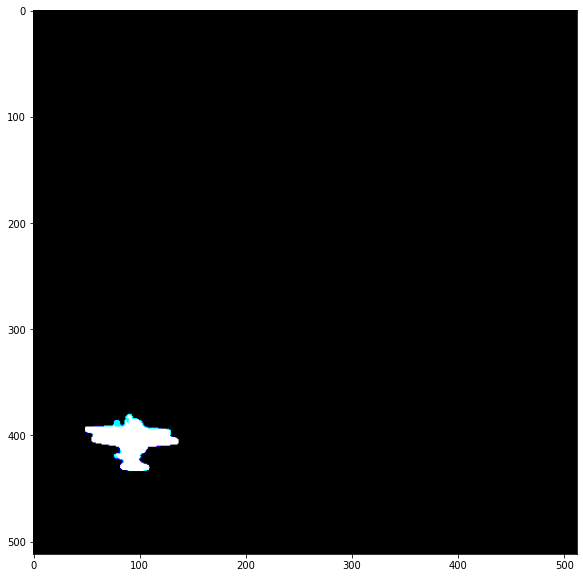

In [91]:
_masks = np.moveaxis(masks, 0, -1)
generated_mask = _masks*255
generated_mask = generated_mask.astype(np.uint8)
pil_mask = Image.fromarray(generated_mask)
plt.figure(figsize=(10,10))
plt.imshow(generated_mask)

In [74]:
tmp = os.path.join('/data/controlnet-1xb1-fill50k_lora/',target_fname.split('.jpg')[0]+'_single_mask.png')

In [75]:
print (tmp)

/data/controlnet-1xb1-fill50k_lora/P1390__512__4368___2496_single_mask.png


In [76]:
np_allmasks.save(tmp)

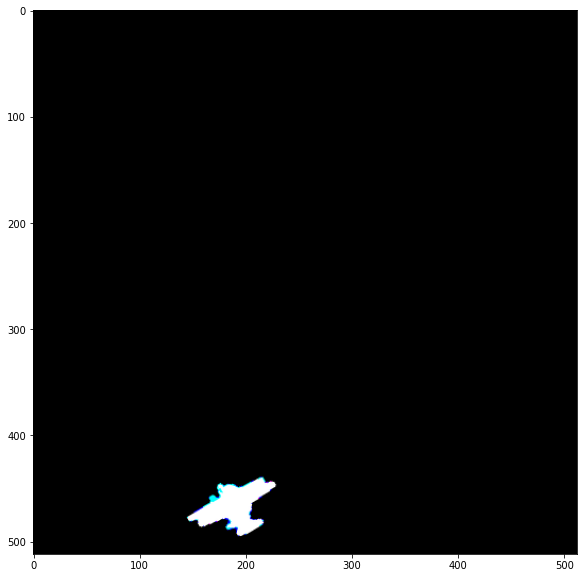

In [92]:
mask_transposed = pil_mask.rotate(30,resample=Image.BICUBIC)
img_transposed = img.rotate(30, resample=Image.BICUBIC)
plt.figure(figsize=(10,10))
plt.imshow(mask_transposed)

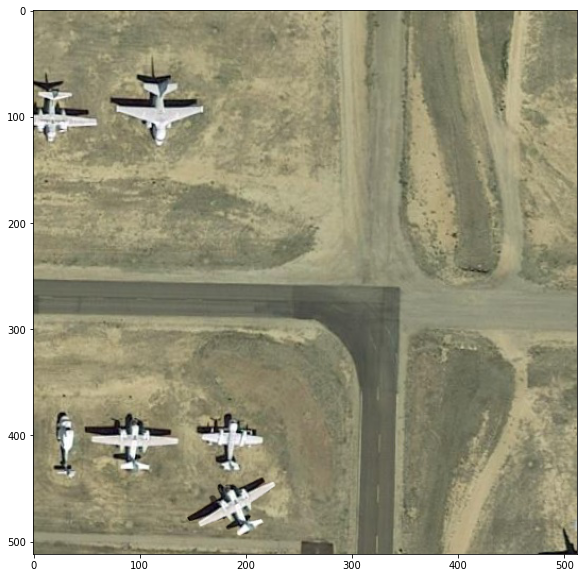

In [93]:
composed_img = Image.composite(img_transposed, img, mask_transposed.convert('L'))
plt.figure(figsize=(10,10))
plt.imshow(composed_img)

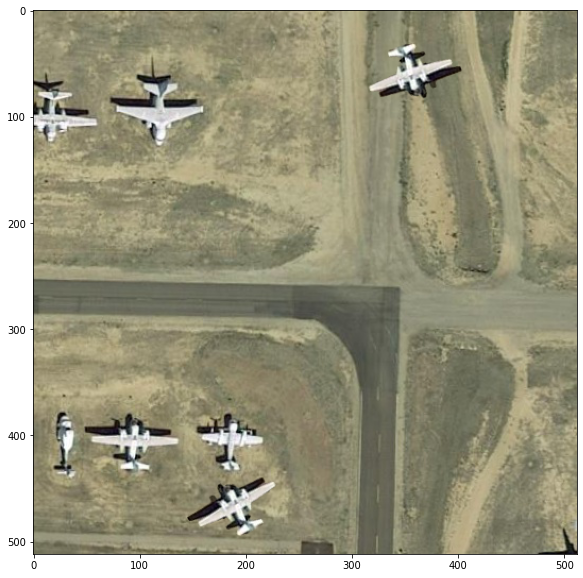

In [94]:
mask_transposed2 = pil_mask.rotate(200,resample=Image.BICUBIC)
img_transposed2 = composed_img.rotate(200, resample=Image.BICUBIC)
composed_img2 = Image.composite(img_transposed2, composed_img, mask_transposed2.convert('L'))
plt.figure(figsize=(10,10))
plt.imshow(composed_img2)